# Stock Price Predictor


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stock = input('enter the stock code')
data = yf.download(stock, '2023-01-01', '2024-01-01', auto_adjust=True)
data.head()

enter the stock code GC=F


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-01-03,1836.199951,1839.699951,1836.199951,1839.699951,29
2023-01-04,1845.599976,1859.099976,1845.599976,1852.800049,25
2023-01-05,1855.199951,1855.199951,1834.800049,1834.800049,24
2023-01-06,1838.400024,1868.199951,1835.300049,1864.199951,26
2023-01-09,1867.000000,1880.000000,1867.000000,1872.699951,62


In [3]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_1744\3152734909.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Close'])


<Axes: xlabel='Close', ylabel='Density'>

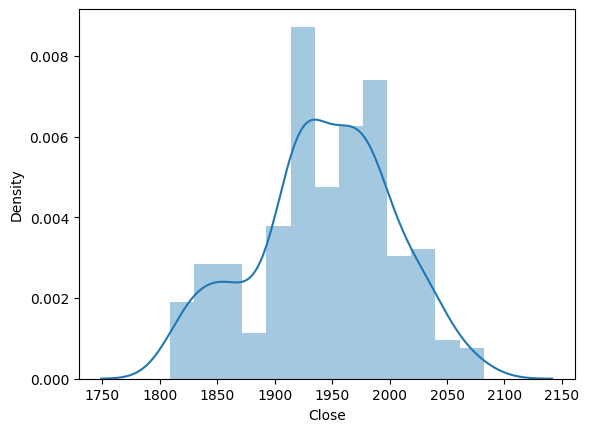

In [5]:
sns.distplot(data['Close'])

## Model Data Preperation

In [6]:
x = data.drop('Close', axis=1)
y = data['Close']


In [7]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## Function to test the metrics

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
def calculate_merics(y_test, prediction):
    mse = mean_squared_error(y_test, prediction)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, prediction)
    print('mse:', mse)
    print('rmse:',rmse)
    print('r2_score:',r2)
    

## Model Building using Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

In [19]:
print(lr_predict)
print(y_test.iloc[0])

[1908.37017452 1896.48089652 1990.19671781 1896.29569795 1926.95218559
 1914.35601189 1916.66147043 2026.94309499 2005.27927503 1944.74133489
 1894.13003076 2057.07887247 1960.06873173 1832.50198845 1924.21093934
 1974.25995536 1981.19240609 1974.9840592  1934.61671202 1977.09045269
 1889.50095707 1826.90438063 1985.75178868 1947.75167093 1950.4269777
 2015.96916595 1913.65545062 1994.59122654 2039.31928145 1816.42852915
 1875.2996952  1984.36556168 1956.27946757 2043.24689453 1994.90148118
 1965.34485559 1940.97181586 1875.37973977 1870.36340028 1906.91817145
 1929.1798844  1927.68396225 1949.4504778  1979.57156992 2018.99192617
 1974.39758194 1923.53323093 1816.25304451 2022.18009222 1922.13556934
 1988.93476464]
1910.5999755859375


In [15]:
calculate_merics(y_test, lr_predict)

mse: 34.7038513826666
rmse: 5.890997486221378
r2_score: 0.9902092416853947


## Model Building using Lasso Regression

In [16]:
from sklearn.linear_model import Lasso

In [17]:
la = Lasso()
la.fit(x_train, y_train)
la_predict = la.predict(x_test)
calculate_merics(y_test, la_predict)

mse: 35.42292787163156
rmse: 5.95171638030842
r2_score: 0.990006373593449


## Model Building Using Ridge Regression

In [20]:
from sklearn.linear_model import Ridge

In [22]:
ri = Ridge()
ri.fit(x_train, y_train)
ri_predict = ri.predict(x_test)
calculate_merics(y_test, ri_predict)

mse: 34.7054013558043
rmse: 5.891129039140485
r2_score: 0.9902088044021602


## Model Optimization

In [23]:
from scipy.stats import norm, skew
from scipy  import stats

C:\Users\HP\AppData\Local\Temp\ipykernel_1744\717961543.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Close'], fit=norm)


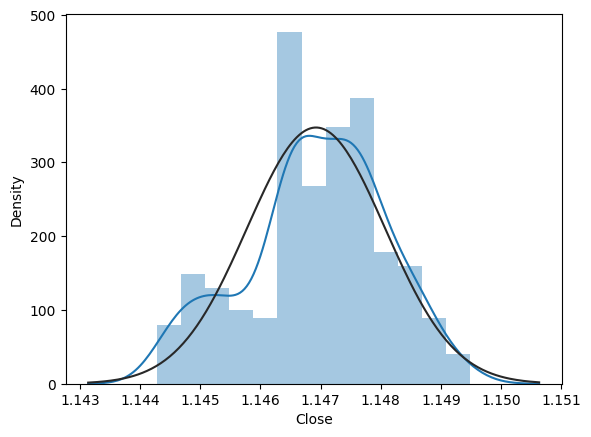

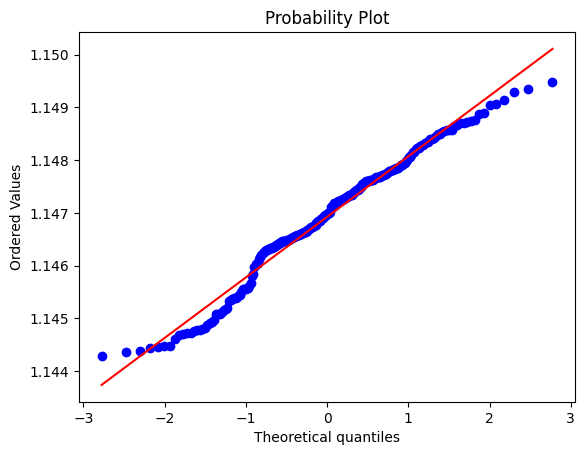

In [26]:
data['Close'] = np.log1p(data['Close'])
sns.distplot(data['Close'], fit=norm)
fig = plt.figure()
res = stats.probplot(data['Close'], plot=plt)
plt.show()

In [27]:
x = data.drop('Close', axis=1)
y = data['Close']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [28]:
ri = Ridge()
ri.fit(x_train, y_train)
ri_predict = ri.predict(x_test)
calculate_merics(y_test, ri_predict)

mse: 1.226779213190446e-08
rmse: 0.00011076006560084938
r2_score: 0.9905555343317893


In [31]:
print(y_test.iloc[0])
print(ri_predict[0])

1.1463216286064872
1.1462616365392797


# Ridge Regression Model is Predicting well after the model optimization

## Loading the Model

In [32]:
import joblib

In [33]:
joblib.dump(ri, 'model.pkl')
Ridge_from_joblib = model = joblib.load('model.pkl')